<a href="https://colab.research.google.com/github/rlackdrhkd/Do-it-deep-learning/blob/main/Do_it_%EB%94%A5%EB%9F%AC%EB%8B%9D_7%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class MultiClassNetwork:

  def __init__(self, units=0, batch_size=32, learning_rate=0.1, l1=0, l2=0):
    self.units = units
    self.batch_size = batch_size
    self.w1 = None
    self.b1 = None
    self.w2 = None
    self.b2 = None
    self.a1 = None
    self.losses = []
    self.val_losses = []
    self.lr = self.learning_rate
    self.l1 = l1
    self.l2 = l2

  def forpass(self,x):
    z1 = np.dot(x,self.w1) + self.b1
    self.a1 = self.sigmoid(z1)
    z2 = np.dot(self.a1,self.w2) + self.b2
    return z2

  def backprop(self,x,err):
    m = len(x)
    w2_grad = np.dot(self.a1.T, err) / m
    b2_grad = np.sum(err) / m
    err_to_hidden = np.dot(err,self.w2.T) * self.a1 * (1 - self.a1)
    w1_grad = np.dot(x.T, err_to_hidden) / m
    b1_grad = np.sum(err_to_hidden, axis=0) / m
    return w1_grad, b1_grad, w2_grad, b2_grad

  def sigmoid(self,z):
    a = 1 / (1 + np.exp(-z))
    return a

  def softmax(self,z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis).reshape(-1,1)

  def init_weights(self, n_features, n_classes):
    self.w1 = np.random.normal(0,1,
                               (n_features,n_classes))
    self.b1 = np.zeros(self.units)
    self.w2 = np.random.normal(0,1,
                               (self.units,n_classes))
    self.b2 = np.zeros(n_classes)

  def fit(self,x,y,epochs=100, x_val=None, y_val=None):
    np.random.seed(42)
    self.init_weights(x.shape[1], y.shape[1])
    for i in range(epochs):
      loss = 0
      print('.', end='')
      for x_batch, y_batch in self.gen_batch(x,y):
        a = self.training(x_batch, y_batch)
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += np.sum(-y_batch*np.log(a))
      self.losses.append((loss + self.reg_loss()) / len(x))
      self.update_val_loss(x_val,y_val)

  def gen_batch(self,x,y):
    length = len(x)
    bins = length // self.batch_size
    if length % self.batch_size:
      bins += 1
    indexes = np.random.permutation(np.arrange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i+1)
      yield x[start:end], y[start:end]

  def training(self,x,y):
    m = len(x)
    z = self.forpass(x)
    a = self.softmax(z)
    err = -(y - a)
    w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x,err)
    w1_grad += (self.l1*np.sign(self.w1) + self.l2 * self.w1) / m
    w2_grad += (self.l1*np.sign(self.w2) + self.l2 * self.w2) / m
    self.w1 -= self.lr * w1_grad
    self.b1 -= self.lr * b1_grad
    self.w2 -= self.lr * w2_grad
    self.b2 -= self.lr * b2_grad
    return

  def perdict(self,x):
    z = self.forpass(x)
    return np.argmax(z, axis=1)

  def score(self,x,y,):
    return np.mean(self.predict(x) == np.argmax(y , axis=1))

  def reg_loss(self):
    return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
           self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)
    a = self.softmax(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss = np.sum(-y_val*np.log(a))
    self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

In [21]:
!pip install tensorflow_gpu==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_gpu-2.0.0-cp37-cp37m-manylinux2010_x86_64.whl (380.8 MB)
  Using cached tensorboard-2.0.2-py3-none-any.whl (3.8 MB)
  Using cached tensorflow_estimator-2.0.1-py2.py3-none-any.whl (449 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0rc0
    Uninstalling tensorflow-estimator-2.10.0rc0:
      Successfully uninstalled tensorflow-estimator-2.10.0rc0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.0
    Uninstalling tensorboard-2.10.0:
      Successfully uninstalled tensorboard-2.10.0
  Attempting uninstall: tensorflow-gpu
    Found existing installation: tensorflow-gpu 2.10.0rc2
    Uninstalling tensorflow-gpu-2.10.0rc2:
      Successfully uninstalled tensorflow-gpu-2.10.0rc2
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

In [22]:
import tensorflow as tf

In [23]:
tf.__version__

'2.0.0'

In [24]:
(x_train_all,y_train_all), (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [26]:
print(x_train_all.shape,y_train_all.shape)

(60000, 28, 28) (60000,)


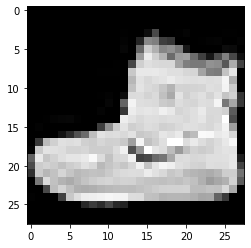

In [28]:
plt.imshow(x_train_all[0], cmap= 'gray')
plt.show()

In [29]:
print(y_train_all[:10])

[9 0 0 3 0 2 7 2 5 5]


In [35]:
class_names = ['T-shirt','pants', 'sweater', 'dress', 'coat',
              'sandle', 'shirt', 'sneakers', 'bag', 'ankle boots']

In [36]:
print(class_names[y_train_all[0]])

ankle boots


In [37]:
np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all, test_size = 0.2, random_state=42)

In [42]:
np.bincount(y_train)

array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800])

In [41]:
np.bincount(y_val)

array([1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200])

In [44]:
x_train = x_train / 255
y_train = y_train / 255

In [45]:
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

In [46]:
print(x_train.shape, x_val.shape)

(48000, 784) (12000, 784)
